In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [4]:
df=pd.read_excel('G:\Machine learning projects\Flight_fare_prediction_\Data\Data_Train.xlsx')

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Explaing about the Data 

Airline                    -- Name of the Airline <br>
Date_of_journey            -- Journey_data<br>
source                     -- Starting place of journey<br>
Destination                -- End place of journey<br>
Route                      -- Route followed in journey<br>
Dep_time                   -- Depature Time<br>
Arrival_time               -- Arrival_time<br>
Duration                   -- Duration of the Journey<br>
Total_stops                -- Total stops for the journey<br>
Additional_info            -- Any comments or addtional information of the journey<br>
Price                      -- Price of the trip our Target Variable<br>

## Stage 1 Data Exploration

In [6]:
df.shape

(10683, 11)

In [7]:
df.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


#### Numerical features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We have few variables with incorrect data types 

In [9]:
def change_data_type(df, columns, change_type):
    for column in columns:
        if change_type == 'int':
            df[column] = df[column].astype(int)
        elif change_type == 'float':
            df[column] = df[column].astype(float)
        elif change_type == 'object':
            df[column] = df[column].astype(object)
        elif change_type == 'datetime':
            df[column] = pd.to_datetime(df[column], errors='coerce')

In [10]:
date_columns=["Date_of_Journey","Arrival_Time","Dep_Time"]
change_data_type(df,date_columns,'datetime')

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-17 05:50:00,2023-11-17 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-17 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-11-17 18:05:00,2023-11-17 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-11-17 16:50:00,2023-11-17 21:35:00,4h 45m,1 stop,No info,13302


If we observe we have got arrival_time and dep_time as current experiment date we can leave that as it is as we extract hour and minutes and drop the respective columns

In [12]:
df["Month_of_journey"]=df.Date_of_Journey.dt.month
df["date_of_journey"]=df.Date_of_Journey.dt.day

In [13]:
def extract_hour(data,cols):
    for col in cols:
        df[col+"_hour"]=df[col].dt.hour

def extract_min(data,cols):
    for col in cols:
        df[col+"_min"]=df[col].dt.minute

In [14]:
extract_hour(df,['Arrival_Time','Dep_Time'])

In [15]:
extract_min(df,['Arrival_Time','Dep_Time'])

Let's all also convert Duratio into minutes so it becomes easy to analyse

In [16]:
def duration_to_minutes(duration):
    parts = duration.strip().split()
    hours = 0
    minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    return hours * 60 + minutes

df['Duration_minutes'] = df['Duration'].apply(duration_to_minutes)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_journey,date_of_journey,Arrival_Time_hour,Dep_Time_hour,Arrival_Time_min,Dep_Time_min,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,1,22,10,20,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-17 05:50:00,2023-11-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,5,15,50,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-17 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,9,25,25,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-11-17 18:05:00,2023-11-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,18,30,5,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-11-17 16:50:00,2023-11-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,16,35,50,285


In [17]:
df.drop(['Duration','Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_journey,date_of_journey,Arrival_Time_hour,Dep_Time_hour,Arrival_Time_min,Dep_Time_min,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,1,22,10,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,5,15,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,9,25,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,18,30,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,16,35,50,285


Now lets differenciate numerical and categorical vaiables

Now we can drop the other columns which we have extarcted the info

In [19]:
categorical_variables=[x for x in df.columns if df[x].dtype=='O']
numerical_variables=[x for x in df.columns if df[x].dtype=='int64']

In [20]:
categorical_variables

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [21]:
numerical_variables

['Price', 'Duration_minutes']

### checking Missing values

In [22]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                1
Total_Stops          1
Additional_Info      0
Price                0
Month_of_journey     0
date_of_journey      0
Arrival_Time_hour    0
Dep_Time_hour        0
Arrival_Time_min     0
Dep_Time_min         0
Duration_minutes     0
dtype: int64

we just have few missing values

## Checking Outliers

Let's see our target avriable has some outliers or not 

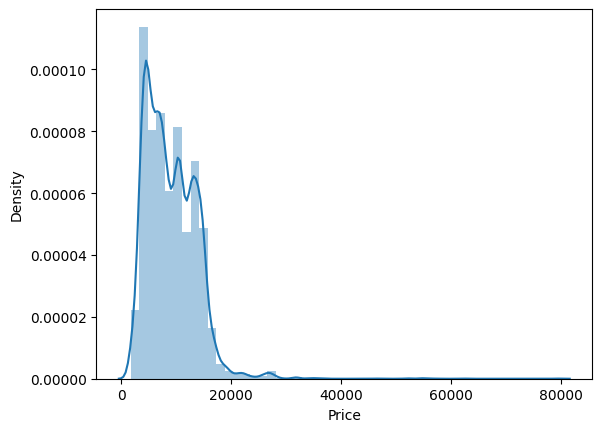

In [23]:
sns.distplot(df['Price'],label="price")
plt.show()

<Axes: ylabel='Price'>

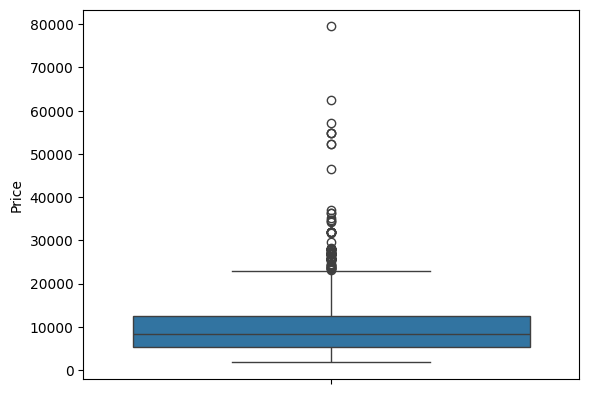

In [24]:
sns.boxplot(df['Price'])

### Numerical and Ctegorical Feature Analysis

#### Airline

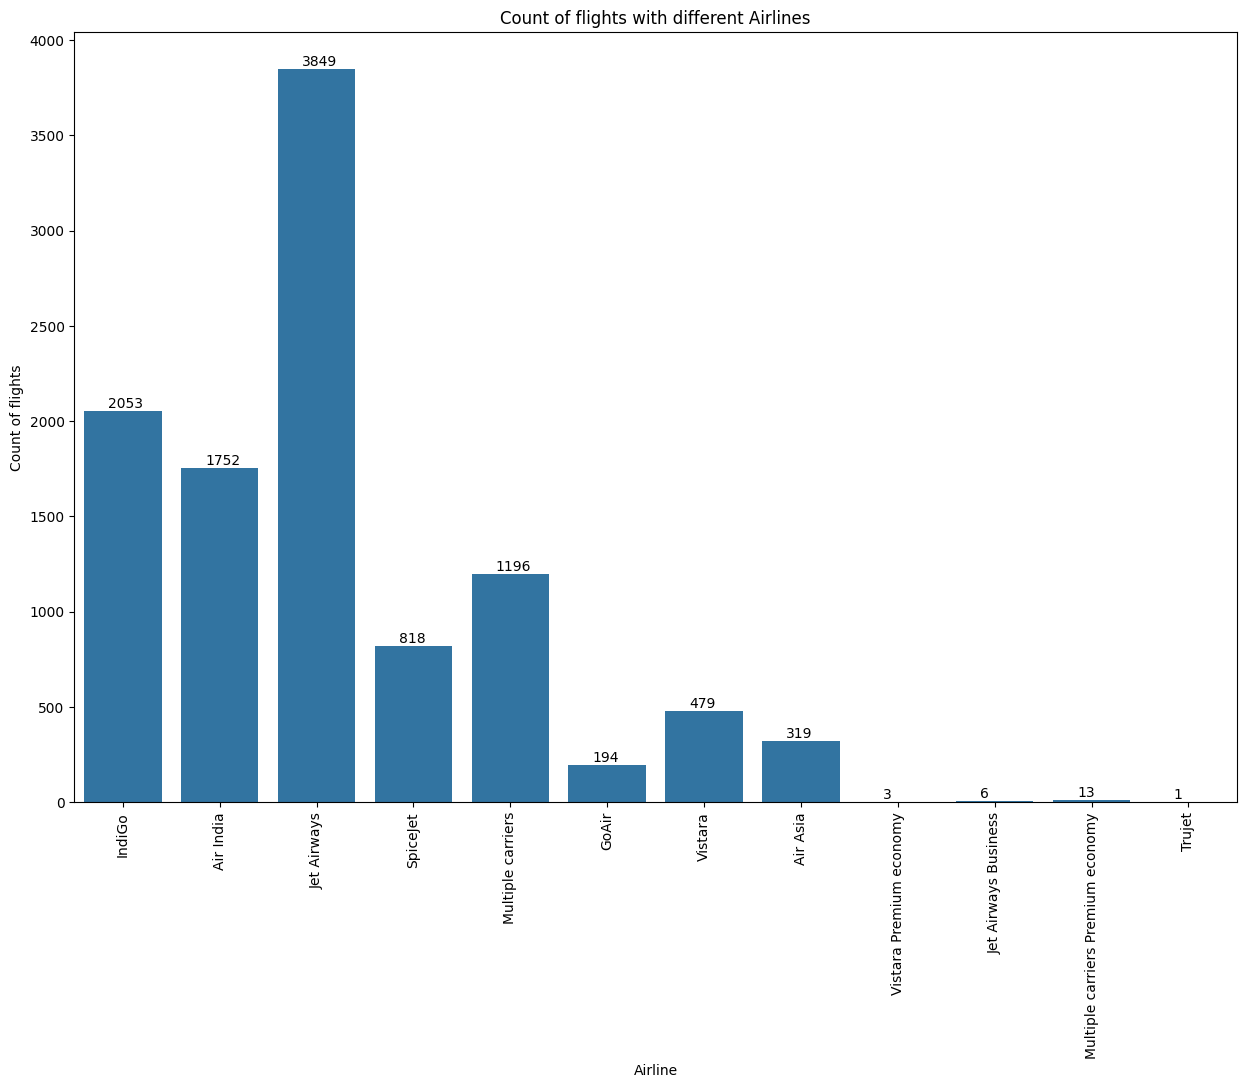

In [25]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

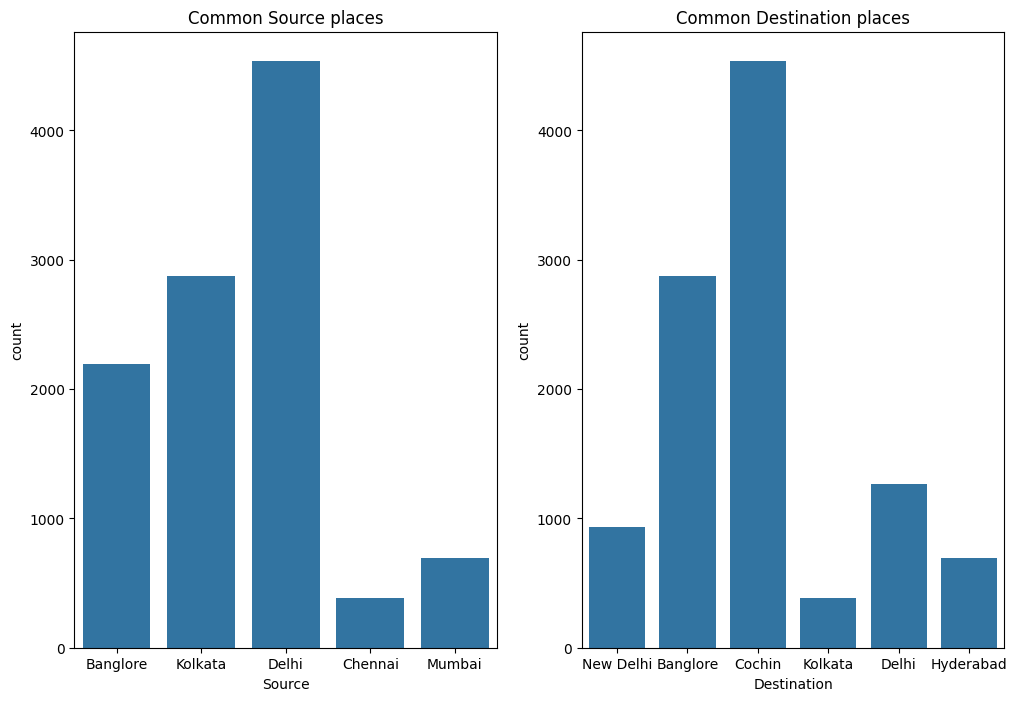

In [26]:
fig,axes=plt.subplots(1,2,figsize=(12,8))

sns.countplot(x=df["Source"],ax=axes[0])
axes[0].set_title("Common Source places")

sns.countplot(x=df['Destination'],ax=axes[1])
axes[1].set_title("Common Destination places")

plt.show()

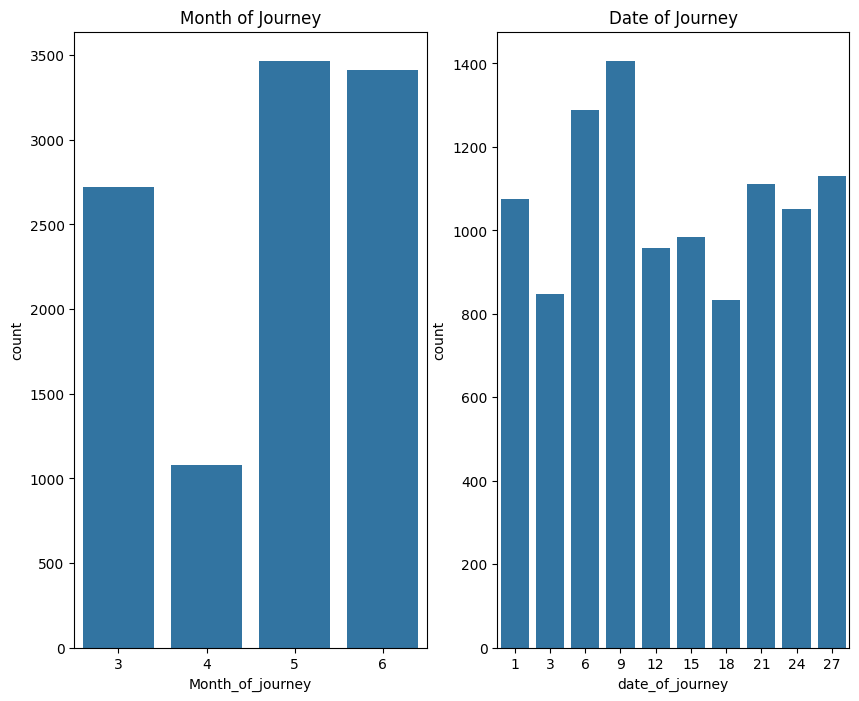

In [27]:
fig,axes=plt.subplots(1,2,figsize=(10,8))

sns.countplot(x=df["Month_of_journey"],ax=axes[0])
axes[0].set_title("Month of Journey")

sns.countplot(x=df['date_of_journey'],ax=axes[1])
axes[1].set_title("Date of Journey")

plt.show()

### Vs Price Analysis

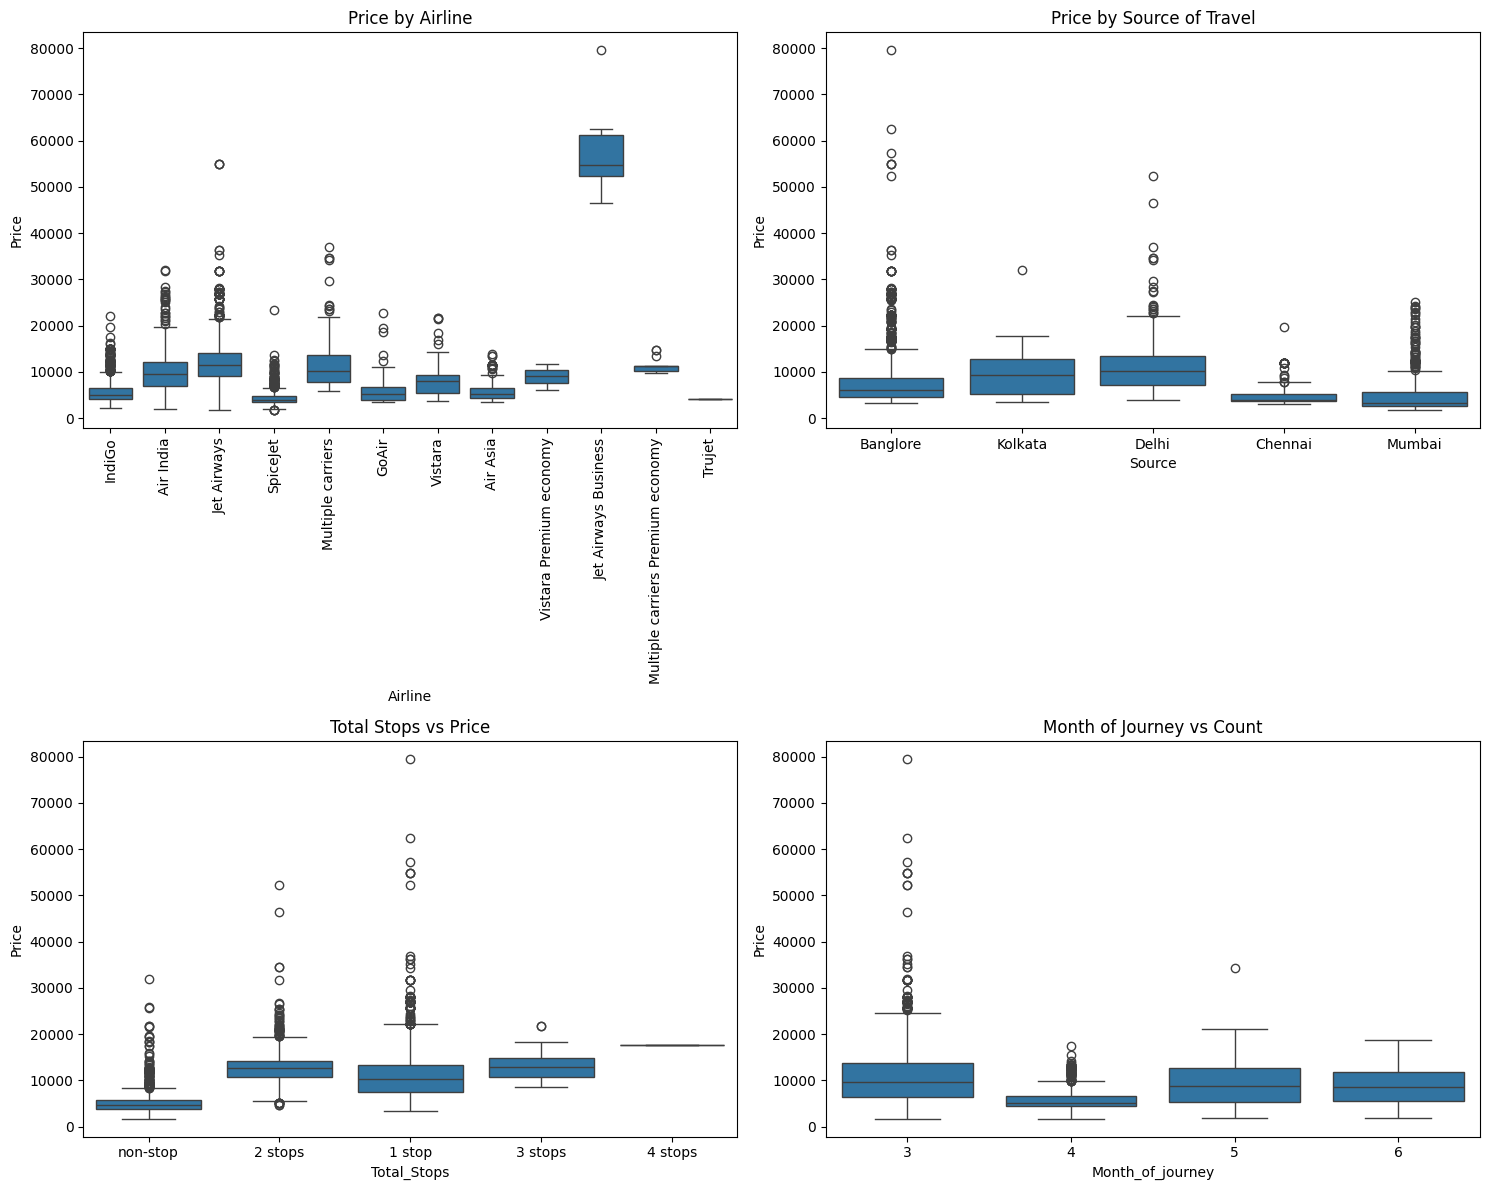

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot for 'Airline'
sns.boxplot(x='Airline', y='Price', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Price by Airline")
axes[0, 0].set_xlabel('Airline')
axes[0, 0].set_ylabel('Price')
axes[0, 0].tick_params(axis='x', rotation=90)

# Boxplot for 'Source'
sns.boxplot(x='Source', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Price by Source of Travel")

# Boxplot for 'Total_Stops'
sns.boxplot(x='Total_Stops', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Total Stops vs Price")

# Countplot for 'Month_of_journey'
sns.boxplot(x='Month_of_journey', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Month of Journey vs Count")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Now Let's try to Handling Missng values Outliers 

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                0
Total_Stops          0
Additional_Info      0
Price                0
Month_of_journey     0
date_of_journey      0
Arrival_Time_hour    0
Dep_Time_hour        0
Arrival_Time_min     0
Dep_Time_min         0
Duration_minutes     0
dtype: int64

### Outlier correction in Target varaible

In [31]:
df.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [32]:
df.Price.median()

8372.0

In [33]:
# Calculate the IQR
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bridges
lower_bridge = Q1 - (IQR * 1.5)
upper_bridge = Q3 + (IQR * 1.5)

print("Lower Bridge:", lower_bridge)
print("Upper Bridge:", upper_bridge)

Lower Bridge: -5367.0
Upper Bridge: 23017.0


In [34]:
# Calculate the lower and upper bridges
lower_bridge_ = Q1 - (IQR * 3)
upper_bridge_ = Q3 + (IQR * 3)

print("Lower Bridge:", lower_bridge_)
print("Upper Bridge:", upper_bridge_)

Lower Bridge: -16011.0
Upper Bridge: 33661.0


In [35]:
df.loc[df['Price'] > upper_bridge_, 'Price'] = upper_bridge_

<Axes: xlabel='Price', ylabel='Density'>

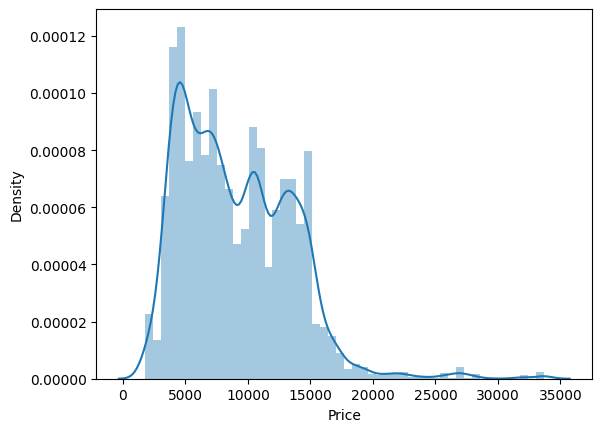

In [36]:
sns.distplot(df['Price'])

### Handling Categrocial variables

In [37]:
categorical_variables

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Airline,Sourse,Destination,Total_stops-One Hot Encoding <br>
Route -- label encoding

In [38]:
def one_hot_encode(dataframe, columns_list):
    for column in columns_list:
        one_hot_encoded = pd.get_dummies(dataframe[column], prefix=column, dtype=int)  # Convert to integer
        dataframe = pd.concat([dataframe, one_hot_encoded], axis=1)
        dataframe = dataframe.drop(column, axis=1)
    
    return dataframe

In [39]:
columns_one_hot=['Airline', 'Source', 'Destination', 'Total_Stops']
df=one_hot_encode(df,columns_one_hot)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Route                                      10682 non-null  object
 1   Additional_Info                            10682 non-null  object
 2   Price                                      10682 non-null  int64 
 3   Month_of_journey                           10682 non-null  int32 
 4   date_of_journey                            10682 non-null  int32 
 5   Arrival_Time_hour                          10682 non-null  int32 
 6   Dep_Time_hour                              10682 non-null  int32 
 7   Arrival_Time_min                           10682 non-null  int32 
 8   Dep_Time_min                               10682 non-null  int32 
 9   Duration_minutes                           10682 non-null  int64 
 10  Airline_Air Asia                       

#### Dropping Info and route info has most as its values as no info and for route we already considered source,destination and stops so it won't useful too

In [41]:
df.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [42]:
df.head()

,Price,Month_of_journey,date_of_journey,Arrival_Time_hour,Dep_Time_hour,Arrival_Time_min,Dep_Time_min,Duration_minutes,Airline_Air Asia,Airline_Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,3,24,1,22,10,20,170,0,0,...,0,0,0,0,1,0,0,0,0,1
1,7662,5,1,13,5,15,50,445,0,1,...,0,0,0,0,0,0,1,0,0,0
2,13882,6,9,4,9,25,25,1140,0,0,...,1,0,0,0,0,0,1,0,0,0
3,6218,5,12,23,18,30,5,325,0,0,...,0,0,0,0,0,1,0,0,0,0
4,13302,3,1,21,16,35,50,285,0,0,...,0,0,0,0,1,1,0,0,0,0


### Standardization of the values

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the numerical columns and transform the data
df_standardized = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

# Display the standardized DataFrame
print(df_standardized.head())


      Price  Month_of_journey  date_of_journey  Arrival_Time_hour  \
0 -1.164699         -1.467402         1.237288          -1.800436   
1 -0.316394          0.250289        -1.475307          -0.050909   
2  1.085056          1.109135        -0.531796          -1.363054   
3 -0.641746          0.250289        -0.177979           1.407030   
4  0.954374         -1.467402        -1.475307           1.115442   

   Dep_Time_hour  Arrival_Time_min  Dep_Time_min  Duration_minutes  \
0       1.654154         -0.890014     -0.234950         -0.931498   
1      -1.303113         -0.587094      1.363607         -0.389953   
2      -0.607286          0.018745      0.031476          0.978679   
3       0.958326          0.321664     -1.034229         -0.626263   
4       0.610412          0.624584      1.363607         -0.705034   

   Airline_Air Asia  Airline_Air India  ...  Destination_Cochin  \
0          -0.17545          -0.442785  ...           -0.859093   
1          -0.17545           

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Price'],axis=1),df['Price'],test_size=0.3)

In [46]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient boosting": GradientBoostingRegressor(),
    "Xg boosting": XGBRegressor()
}

# Assuming x_train, x_test, y_train, y_test are defined

for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train Model
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate performance metrics using the mean_squarred_error function
    train_MSE = mean_squared_error(y_train, y_train_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)

    # Calculate performance metrics using the mean_absolute_error function
    train_MAE = mean_absolute_error(y_train, y_train_pred)
    test_MAE = mean_absolute_error(y_test, y_test_pred)

    # Calculate performance metrics using the r2 function
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    
    
    print(model_name)
    print("Model performance(MSE) for training set:")
    print(f"train_MSE: {train_MSE}")
    print("Model performance(MSE) for test set:")
    print(f"test_MSE: {test_MSE}")
    print("------------------------------")
    print("Model performance(MAE) for training set:")
    print(f"train_MAE: {train_MAE}")
    print("Model performance(MAE) for test set:")
    print(f"test_MAE: {test_MAE}")
    print("------------------------------")
    print("Model performance(r2_score) for training set:")
    print(f"train_r2_score: {train_r2}")
    print("Model performance(r2_score) for test set:")
    print(f"test_r2_score: {test_r2}")
    print("-" * 40)
    print("\n")


Linear Regression
Model performance(MSE) for training set:
train_MSE: 7520702.391541091
Model performance(MSE) for test set:
test_MSE: 7391994.711830532
------------------------------
Model performance(MAE) for training set:
train_MAE: 1951.4518894338846
Model performance(MAE) for test set:
test_MAE: 1933.0171773499064
------------------------------
Model performance(r2_score) for training set:
train_r2_score: 0.6170298096631559
Model performance(r2_score) for test set:
test_r2_score: 0.6272736531479195
----------------------------------------


Ridge
Model performance(MSE) for training set:
train_MSE: 7530827.1492658695
Model performance(MSE) for test set:
test_MSE: 7402858.376905609
------------------------------
Model performance(MAE) for training set:
train_MAE: 1954.563576652681
Model performance(MAE) for test set:
test_MAE: 1935.9218164525246
------------------------------
Model performance(r2_score) for training set:
train_r2_score: 0.616514235426721
Model performance(r2_score) 

#### We see from above Xg boost and random forest models has been performing better for all the three metrics

#### Hyper-Parameter Tunning

In [49]:
n_estimators = [int(x) for x in np.linspace(20, 200, 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, 10)]
min_samples_split = [2, 3, 5, 7, 9]  
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
} 

In [50]:
randomcv_models=[
    ('Random forest',RandomForestRegressor(),random_grid),
    ('XG boost',XGBRegressor(),random_grid)

]

In [51]:
randomcv_models

[('Random forest',
  RandomForestRegressor(),
  {'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
   'min_samples_split': [2, 3, 5, 7, 9],
   'min_samples_leaf': [1, 2, 4, 6, 8]}),
 ('XG boost',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators

In [53]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=25,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                             )
    random.fit(x_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"-------------------Best Params for {model_name}--------------")
    print(model_param[model_name]) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Fitting 3 folds for each of 25 candidates, totalling 75 fits
-------------------Best Params for Random forest--------------
{'n_estimators': 160, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70}
-------------------Best Params for XG boost--------------
{'n_estimators': 60, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
##Fitting Grid_search_cv to the data

rf=RandomForestRegressor()
grid_seach=Grid